In [327]:
from orphics import io, maps, lensing, cosmology, stats
from pixell import enmap, curvedsky
import numpy as np
import os, sys
import healpy as hp
import matplotlib.pylab as plt
import symlens as s
from symlens import utils
import importlib
from mpi4py import MPI
import pandas as pd
import tools
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [328]:
# use maps provided by websky
map_path = 'maps/websky/'
# path of output data
data_path = 'data/'
# path of output plots
plot_path = 'temp/'

In [329]:
ksz = pd.read_csv(data_path + 'ksz_cl.csv')

bin_width = 20
bin_ellmin, bin_ellmax = 10, 6100
bin_ells = ksz['ell'].values[bin_ellmin:bin_ellmax+1]
ksz_cl = ksz['ksz_cl'].values[bin_ellmin:bin_ellmax+1]

smooth_ellmin, smooth_ellmax = 20, 6000
smooth_width = 1

In [330]:
importlib.reload(tools)
S = tools.bin_smooth(bin_ells, ksz_cl, bin_width)
smooth_ells, smooth_ksz_cl = S.smooth(smooth_ellmin, smooth_ellmax, smooth_width)

<module 'tools' from '/global/cscratch1/sd/hongbo/new_reion-lens/tools.py'>

Text(0.5, 1.0, 'before smooth, ellmin=10 ellmax=6100')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

Text(0.5, 1.0, 'after smooth, ellmin=20 ellmax=6000')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

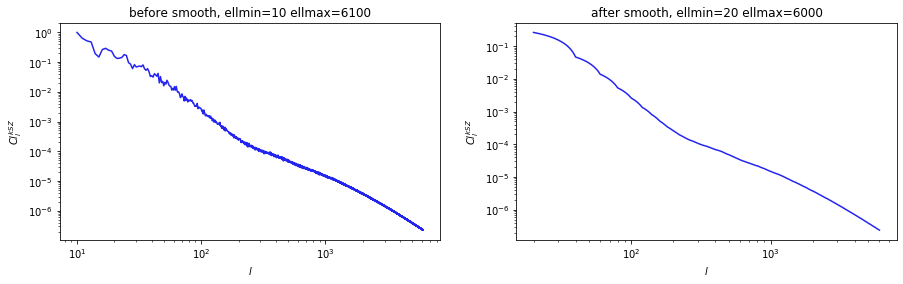

In [331]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

ax[0].plot(bin_ells, ksz_cl)
ax[0].set_title(f'before smooth, ellmin={bin_ellmin} ellmax={bin_ellmax}')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('$l$')                                                                        
ax[0].set_ylabel('$Cl_{l}^{kSZ}$')      

ax[1].plot(smooth_ells, smooth_ksz_cl)
ax[1].set_title(f'after smooth, ellmin={smooth_ellmin} ellmax={smooth_ellmax}')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('$l$')                                                                        
ax[1].set_ylabel('$Cl_{l}^{kSZ}$')      

plt.savefig(plot_path+'smooth.png')

In [332]:
ksz_cl = np.concatenate([np.zeros(smooth_ellmin), smooth_ksz_cl])
smooth_ells = np.concatenate([np.arange(0, smooth_ellmin ,1), smooth_ells])
num = 10
ksz_g_alm = hp.synalm(ksz_cl) 
ksz_g_cl = hp.alm2cl(ksz_g_alm)

Text(0.5, 1.0, 'ksz_cl, ellmin=20 ellmax=6000')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

Text(0.5, 1.0, 'ksz_cl_g from 1 realization, ellmin=20 ellmax=6000')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

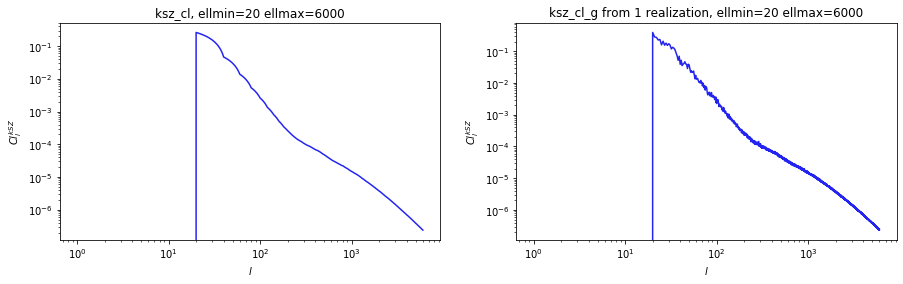

In [334]:
fig1, ax1 = plt.subplots(1,2,figsize=(15,4))

ax1[0].plot(smooth_ells, ksz_cl)
ax1[0].set_title(f'ksz_cl, ellmin={smooth_ellmin} ellmax={smooth_ellmax}')
ax1[0].set_xscale('log')
ax1[0].set_yscale('log')
ax1[0].set_xlabel('$l$')                                                                        
ax1[0].set_ylabel('$Cl_{l}^{kSZ}$')      

ax1[1].plot(smooth_ells, ksz_g_cl)
ax1[1].set_title(f'ksz_cl_g from 1 realization, ellmin={smooth_ellmin} ellmax={smooth_ellmax}')
ax1[1].set_xscale('log')
ax1[1].set_yscale('log')
ax1[1].set_xlabel('$l$')                                                                        
ax1[1].set_ylabel('$Cl_{l}^{kSZ}$')      

plt.savefig(plot_path+'realizations_ksz_cl.png')

Text(0.5, 1.0, '$Cl_{l}^{kSZ}$')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

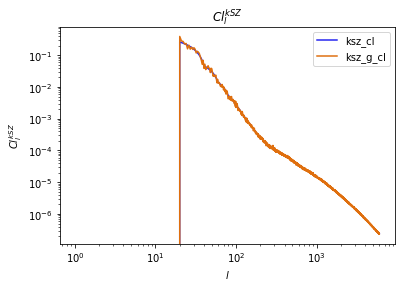

In [337]:
# check one realization ksz_cl_g and  ksz_cl
plt.loglog(smooth_ells, ksz_cl)
plt.loglog(smooth_ells, ksz_g_cl)
plt.legend([ 'ksz_cl', 'ksz_g_cl'])
plt.title('$Cl_{l}^{kSZ}$')
plt.xlabel('$l$')
plt.ylabel('$Cl_{l}^{kSZ}$')
plt.savefig(plot_path+'realization_comparision.png')

In [340]:
# Write ksz_g_alm on disk
hp.write_alm(map_path+f'ksz_g_alm_lmax_{smooth_ellmax}.fits', ksz_g_alm, overwrite=True)

In [296]:
# Write ksz_alm on disk
ksz = hp.read_map(map_path+f'ksz_patchy.fits')
ksz_alm = hp.map2alm(ksz, lmax=smooth_ellmax)
hp.write_alm(map_path+f'ksz_alm_lmax_{smooth_ellmax}.fits', ksz_alm, overwrite=True)

/global/homes/h/hongbo/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/global/homes/h/hongbo/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [297]:
# Write input kap_alm on disk
kap_map = hp.read_map(map_path+'kap.fits',hdu=1)
kap_alm = hp.map2alm(kap_map, lmax=smooth_ellmax)
hp.write_alm(map_path+f'kap_alm_lmax_{smooth_ellmax}.fits', kap_alm, overwrite=True)

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
